In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import pandas as pd
from scipy.stats import rankdata
import matplotlib as mpl
from weightedcorr import WeightedCorr


In [2]:
rep_no = 5

C4_diff_weight_all = np.zeros((rep_no, 2000,2000))
C4_nona_weight_all = np.zeros((rep_no, 2000,2000))
C8_diff_weight_all = np.zeros((rep_no, 2000,2000))
C8_nona_weight_all = np.zeros((rep_no, 2000,2000))
C12_diff_weight_all = np.zeros((rep_no, 2000,2000))
C12_nona_weight_all = np.zeros((rep_no, 2000,2000))

C4_diff_sub_all = np.zeros((rep_no, 2000,2000))
C4_nona_sub_all = np.zeros((rep_no, 2000,2000))
C8_diff_sub_all = np.zeros((rep_no, 2000,2000))
C8_nona_sub_all = np.zeros((rep_no, 2000,2000))
C12_diff_sub_all = np.zeros((rep_no, 2000,2000))
C12_nona_sub_all = np.zeros((rep_no, 2000,2000))

C4_diff_scale_all = np.zeros((rep_no, 2000))
C4_nona_scale_all = np.zeros((rep_no, 2000))
C8_diff_scale_all = np.zeros((rep_no, 2000))
C8_nona_scale_all = np.zeros((rep_no, 2000))
C12_diff_scale_all = np.zeros((rep_no, 2000))
C12_nona_scale_all = np.zeros((rep_no, 2000))

C4_rand_all = np.zeros((rep_no, 2000, 2000))
C4_rand_scale_all = np.random.rand(rep_no, 2000)
C8_rand_all = np.zeros((rep_no, 2000, 2000))
C8_rand_scale_all = np.random.rand(rep_no, 2000)
C12_rand_all = np.zeros((rep_no, 2000, 2000))
C12_rand_scale_all = np.random.rand(rep_no, 2000)

for i in tnrange(rep_no):
    if i == 0:
        C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]

        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
        C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
        C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    else:
        C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]

        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
        C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
        C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    C4_diff_scale_all[i] = C4_diff_scale
    C4_nona_scale_all[i] = C4_nona_scale
    C8_diff_scale_all[i] = C8_diff_scale
    C8_nona_scale_all[i] = C8_nona_scale
    C12_diff_scale_all[i] = C12_diff_scale
    C12_nona_scale_all[i] = C12_nona_scale
    
    C4_diff_idx = np.zeros((2000))
    C4_nona_idx = np.zeros((2000))
    C8_diff_idx = np.zeros((2000))
    C8_nona_idx = np.zeros((2000))
    C12_diff_idx = np.zeros((2000))
    C12_nona_idx = np.zeros((2000))
    
    C4_rand_idx = np.random.randint(0,5,(2000))
    C8_rand_idx = np.random.randint(0,8,(2000))
    C12_rand_idx = np.random.randint(0,12,(2000))

    for j in range(2000):
        C4_diff_idx[j] = np.argmax(C4_diff_raw[:,j])
        C4_nona_idx[j] = np.argmax(C4_nona_raw[:,j])
        C8_diff_idx[j] = np.argmax(C8_diff_raw[:,j])
        C8_nona_idx[j] = np.argmax(C8_nona_raw[:,j])
        C12_diff_idx[j] = np.argmax(C12_diff_raw[:,j])
        C12_nona_idx[j] = np.argmax(C12_nona_raw[:,j])

    for j in range(2000):
        for k in range(2000):
            if C4_diff_idx[j] != C4_diff_idx[k]:
                C4_diff_sub_all[i,j,k] = 1
                C4_diff_sub_all[i,k,j] = 1
            if C4_nona_idx[j] != C4_nona_idx[k]:
                C4_nona_sub_all[i,j,k] = 1
                C4_nona_sub_all[i,k,j] = 1
            if C8_diff_idx[j] != C8_diff_idx[k]:
                C8_diff_sub_all[i,j,k] = 1
                C8_diff_sub_all[i,k,j] = 1
            if C8_nona_idx[j] != C8_nona_idx[k]:
                C8_nona_sub_all[i,j,k] = 1
                C8_nona_sub_all[i,k,j] = 1
            if C12_diff_idx[j] != C12_diff_idx[k]:
                C12_diff_sub_all[i,j,k] = 1
                C12_diff_sub_all[i,k,j] = 1
            if C12_nona_idx[j] != C12_nona_idx[k]:
                C12_nona_sub_all[i,j,k] = 1
                C12_nona_sub_all[i,k,j] = 1
            if C4_rand_idx[j] != C4_rand_idx[k]:
                C4_rand_all[i,j,k] = 1
                C4_rand_all[i,k,j] = 1
            if C8_rand_idx[j] != C8_rand_idx[k]:
                C8_rand_all[i,j,k] = 1
                C8_rand_all[i,k,j] = 1
            if C12_rand_idx[j] != C12_rand_idx[k]:
                C12_rand_all[i,j,k] = 1
                C12_rand_all[i,k,j] = 1
    
    for j in range(2000):
        for k in range(2000):
            C4_diff_weight_all[i,j,k] = np.abs(C4_diff_scale[j] - C4_diff_scale[k])
            C8_diff_weight_all[i,j,k] = np.abs(C8_diff_scale[j] - C8_diff_scale[k])
            C12_diff_weight_all[i,j,k] = np.abs(C12_diff_scale[j] - C12_diff_scale[k])
            
            C4_nona_weight_all[i,j,k] = np.abs(C4_nona_scale[j] - C4_nona_scale[k])
            C8_nona_weight_all[i,j,k] = np.abs(C8_nona_scale[j] - C8_nona_scale[k])
            C12_nona_weight_all[i,j,k] = np.abs(C12_nona_scale[j] - C12_nona_scale[k])

gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
gru4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend = true4_dend_na - true4_dend_nona
true4_dend_nona = true4_dend_nona - np.mean(true4_dend_nona, 1).reshape(-1,1)
gru4_nona_subout -= np.mean(gru4_nona_subout, 1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

/tmp/ipykernel_27195/4156230864.py:31: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(rep_no):


  0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
C4_clust_idx = np.zeros((2000))
C8_clust_idx = np.zeros((2000))
C12_clust_idx = np.zeros((2000))

for i in range(4):
    C4_clust_idx[880+60*i:880+60*(i+1)] = i+1
for i in range(8):
    C8_clust_idx[880+30*i:880+30*(i+1)] = i+1
for i in range(12):
    C12_clust_idx[880+20*i:880+20*(i+1)] = i+1
    
C4_clust = np.zeros((2000,2000))
C8_clust = np.zeros((2000,2000))
C12_clust = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_clust_idx[i] != C4_clust_idx[j]:
            C4_clust[i,j] = 1
            C4_clust[j,i] = 1
        if C8_clust_idx[i] != C8_clust_idx[j]:
            C8_clust[i,j] = 1
            C8_clust[j,i] = 1
        if C12_clust_idx[i] != C12_clust_idx[j]:
            C12_clust[i,j] = 1
            C12_clust[j,i] = 1

/tmp/ipykernel_27195/2949891472.py:16: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
C4_dist = np.zeros((2000,2000))
C8_dist = np.zeros((2000,2000))
C12_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])
        C8_dist[i,j] = np.abs(C8_dist_raw[i] - C8_dist_raw[j])
        C12_dist[i,j] = np.abs(C12_dist_raw[i] - C12_dist_raw[j])

/tmp/ipykernel_27195/390400844.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [5]:
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
x_part += 880
y_part += 880
x_mini, y_mini = np.triu_indices(240, k=0)

C4_clust_vec = C4_clust[x_part,y_part]
C8_clust_vec = C8_clust[x_part,y_part]
C12_clust_vec = C12_clust[x_part,y_part]
C4_dist_vec = C4_dist[x_part,y_part]
C8_dist_vec = C8_dist[x_part,y_part]
C12_dist_vec = C12_dist[x_part,y_part]

C4_orthog_vec = C4_clust_vec - C4_dist_vec * np.dot(C4_clust_vec, C4_dist_vec) / np.dot(C4_dist_vec, C4_dist_vec)
C8_orthog_vec = C8_clust_vec - C8_dist_vec * np.dot(C8_clust_vec, C8_dist_vec) / np.dot(C8_dist_vec, C8_dist_vec)
C12_orthog_vec = C12_clust_vec - C12_dist_vec * np.dot(C12_clust_vec, C12_dist_vec) / np.dot(C12_dist_vec, C12_dist_vec)

C4_orthog = np.zeros((240,240))
C8_orthog = np.zeros((240,240))
C12_orthog = np.zeros((240,240))

C4_orthog[x_mini,y_mini] = C4_orthog_vec
C8_orthog[x_mini,y_mini] = C8_orthog_vec
C12_orthog[x_mini,y_mini] = C12_orthog_vec
C4_orthog[y_mini,x_mini] = C4_orthog_vec
C8_orthog[y_mini,x_mini] = C8_orthog_vec
C12_orthog[y_mini,x_mini] = C12_orthog_vec

In [6]:
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
x_part += 880
y_part += 880
x_mini, y_mini = np.triu_indices(240, k=0)

corr_type = "pearson"

within_corrs_weighted = np.zeros((rep_no*(rep_no-1)//2,15))
across_corrs_weighted = np.zeros((rep_no,6))
dist_corrs_weighted = np.zeros((rep_no,15))
clust_corrs_weighted = np.zeros((rep_no,15))

C4_diff_scale_mat_all = np.matmul(C4_diff_scale_all.reshape(rep_no,-1,1), C4_diff_scale_all.reshape(rep_no,1,-1))
C4_nona_scale_mat_all = np.matmul(C4_nona_scale_all.reshape(rep_no,-1,1), C4_nona_scale_all.reshape(rep_no,1,-1))
C8_diff_scale_mat_all = np.matmul(C8_diff_scale_all.reshape(rep_no,-1,1), C8_diff_scale_all.reshape(rep_no,1,-1))
C8_nona_scale_mat_all = np.matmul(C8_nona_scale_all.reshape(rep_no,-1,1), C8_nona_scale_all.reshape(rep_no,1,-1))
C12_diff_scale_mat_all = np.matmul(C12_diff_scale_all.reshape(rep_no,-1,1), C12_diff_scale_all.reshape(rep_no,1,-1))
C12_nona_scale_mat_all = np.matmul(C12_nona_scale_all.reshape(rep_no,-1,1), C12_nona_scale_all.reshape(rep_no,1,-1))
C4_rand_scale_mat_all = np.matmul(C4_rand_scale_all.reshape(rep_no,-1,1), C4_rand_scale_all.reshape(rep_no,1,-1))
C8_rand_scale_mat_all = np.matmul(C8_rand_scale_all.reshape(rep_no,-1,1), C8_rand_scale_all.reshape(rep_no,1,-1))
C12_rand_scale_mat_all = np.matmul(C12_rand_scale_all.reshape(rep_no,-1,1), C12_rand_scale_all.reshape(rep_no,1,-1))

for i in tnrange(3):
    if i == 0:
        dist_mat = C4_dist
        clust_mat = C4_orthog
        diff_weight_mat_all = C4_diff_weight_all
        nona_weight_mat_all = C4_nona_weight_all
        diff_sub_mat_all = C4_diff_sub_all
        nona_sub_mat_all = C4_nona_sub_all
        diff_scale_mat_all = C4_diff_scale_mat_all
        nona_scale_mat_all = C4_nona_scale_mat_all
        rand_mat_all = C4_rand_all
        rand_scale_mat_all = C4_rand_scale_mat_all
        
    elif i == 1:
        dist_mat = C8_dist
        clust_mat = C8_orthog
        diff_weight_mat_all = C8_diff_weight_all
        nona_weight_mat_all = C8_nona_weight_all
        diff_sub_mat_all = C8_diff_sub_all
        nona_sub_mat_all = C8_nona_sub_all
        diff_scale_mat_all = C8_diff_scale_mat_all
        nona_scale_mat_all = C8_nona_scale_mat_all
        rand_mat_all = C8_rand_all
        rand_scale_mat_all = C8_rand_scale_mat_all

    elif i == 2:
        dist_mat = C12_dist
        clust_mat = C12_orthog
        diff_weight_mat_all = C12_diff_weight_all
        nona_weight_mat_all = C12_nona_weight_all
        diff_sub_mat_all = C12_diff_sub_all
        nona_sub_mat_all = C12_nona_sub_all
        diff_scale_mat_all = C12_diff_scale_mat_all
        nona_scale_mat_all = C12_nona_scale_mat_all
        rand_mat_all = C12_rand_all
        rand_scale_mat_all = C12_rand_scale_mat_all
        
    across_count = 0
    within_count = 0
    for j in range(rep_no):
        weight = diff_scale_mat_all[j][x,y] * nona_scale_mat_all[j][x,y]
        across_sub_corr_val = WeightedCorr(x=pd.Series(diff_sub_mat_all[j][x,y]),
                   y=pd.Series(nona_sub_mat_all[j][x,y]),
                   w=pd.Series(weight))(method=corr_type)
        across_corrs_weighted[across_count,i*2] = across_sub_corr_val
        across_weight_corr_val = WeightedCorr(x=pd.Series(diff_weight_mat_all[j][x,y]),
                   y=pd.Series(nona_weight_mat_all[j][x,y]),
                   w=pd.Series(weight))(method=corr_type)
        across_corrs_weighted[across_count,i*2+1] = across_weight_corr_val
        across_count += 1
            
        for k in range(j+1,rep_no,1):
            diff_weight = diff_scale_mat_all[j][x,y] * diff_scale_mat_all[k][x,y]
            nona_weight = nona_scale_mat_all[j][x,y] * nona_scale_mat_all[k][x,y]
            
            within_diff_sub_corr_val = WeightedCorr(x=pd.Series(diff_sub_mat_all[j][x,y]),
                   y=pd.Series(diff_sub_mat_all[k][x,y]),
                   w=pd.Series(diff_weight))(method=corr_type)
            within_nona_sub_corr_val = WeightedCorr(x=pd.Series(nona_sub_mat_all[j][x,y]),
                   y=pd.Series(nona_sub_mat_all[k][x,y]),
                   w=pd.Series(nona_weight))(method=corr_type)
            within_corrs_weighted[within_count,i*4] = within_nona_sub_corr_val
            within_corrs_weighted[within_count,i*4+2] = within_diff_sub_corr_val
            
            within_diff_weight_corr_val = WeightedCorr(x=pd.Series(diff_weight_mat_all[j][x,y]),
                   y=pd.Series(diff_weight_mat_all[k][x,y]),
                   w=pd.Series(diff_weight))(method=corr_type)
            within_nona_weight_corr_val = WeightedCorr(x=pd.Series(nona_weight_mat_all[j][x,y]),
                   y=pd.Series(nona_weight_mat_all[k][x,y]),
                   w=pd.Series(nona_weight))(method=corr_type)
            within_corrs_weighted[within_count,i*4+1] = within_nona_weight_corr_val
            within_corrs_weighted[within_count,i*4+3] = within_diff_weight_corr_val
            
            rand_weight = rand_scale_mat_all[j][x,y] * rand_scale_mat_all[k][x,y]
            within_rand_corr_val = WeightedCorr(x=pd.Series(rand_mat_all[j][x,y]),
                   y=pd.Series(rand_mat_all[k][x,y]),
                   w=pd.Series(rand_weight))(method=corr_type)
            within_corrs_weighted[within_count,i+12] = within_rand_corr_val            
            
            within_count += 1
        
        nona_weight = nona_scale_mat_all[j][x,y]
        diff_weight = diff_scale_mat_all[j][x,y]
        
        dist_nona_sub_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(nona_sub_mat_all[j][x,y]),
                   w=pd.Series(nona_weight))(method=corr_type)
        dist_diff_sub_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(diff_sub_mat_all[j][x,y]),
                   w=pd.Series(diff_weight))(method=corr_type)
        dist_nona_weight_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(nona_weight_mat_all[j][x,y]),
                   w=pd.Series(nona_weight))(method=corr_type)
        dist_diff_weight_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(diff_weight_mat_all[j][x,y]),
                   w=pd.Series(diff_weight))(method=corr_type)

        dist_corrs_weighted[j,i*4] = dist_nona_sub_corr_val
        dist_corrs_weighted[j,i*4+2] = dist_diff_sub_corr_val
        dist_corrs_weighted[j,i*4+1] = dist_nona_weight_corr_val
        dist_corrs_weighted[j,i*4+3] = dist_diff_weight_corr_val
        
        rand_weight = rand_scale_mat_all[j][x,y]
        dist_rand_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(rand_mat_all[j][x,y]),
                   w=pd.Series(rand_weight))(method=corr_type)
        dist_corrs_weighted[j,i+12] = dist_rand_corr_val
        
        nona_weight_part = nona_scale_mat_all[j][x_part,y_part]
        diff_weight_part = diff_scale_mat_all[j][x_part,y_part]

        clust_nona_sub_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(nona_sub_mat_all[j][x_part,y_part]),
                   w=pd.Series(nona_weight_part))(method=corr_type)
        clust_diff_sub_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(diff_sub_mat_all[j][x_part,y_part]),
                   w=pd.Series(diff_weight_part))(method=corr_type)
        clust_nona_weight_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(nona_weight_mat_all[j][x_part,y_part]),
                   w=pd.Series(nona_weight_part))(method=corr_type)
        clust_diff_weight_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(diff_weight_mat_all[j][x_part,y_part]),
                   w=pd.Series(diff_weight_part))(method=corr_type)
        
        clust_corrs_weighted[j,i*4] = clust_nona_sub_corr_val
        clust_corrs_weighted[j,i*4+2] = clust_diff_sub_corr_val
        clust_corrs_weighted[j,i*4+1] = clust_nona_weight_corr_val
        clust_corrs_weighted[j,i*4+3] = clust_diff_weight_corr_val
        
        rand_weight_part = rand_scale_mat_all[j][x_part,y_part]
        clust_rand_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(rand_mat_all[j][x_part,y_part]),
                   w=pd.Series(rand_weight_part))(method=corr_type)
        clust_corrs_weighted[j,i+12] = clust_rand_corr_val


/tmp/ipykernel_27195/3496480563.py:24: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(3):


  0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_27195/2801303580.py:203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_27195/2801303580.py:205: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig("/home/sklee/dendrite/fig9/fig9_raw.pdf", bbox_inches="tight", transparent=True)
/home/sklee/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


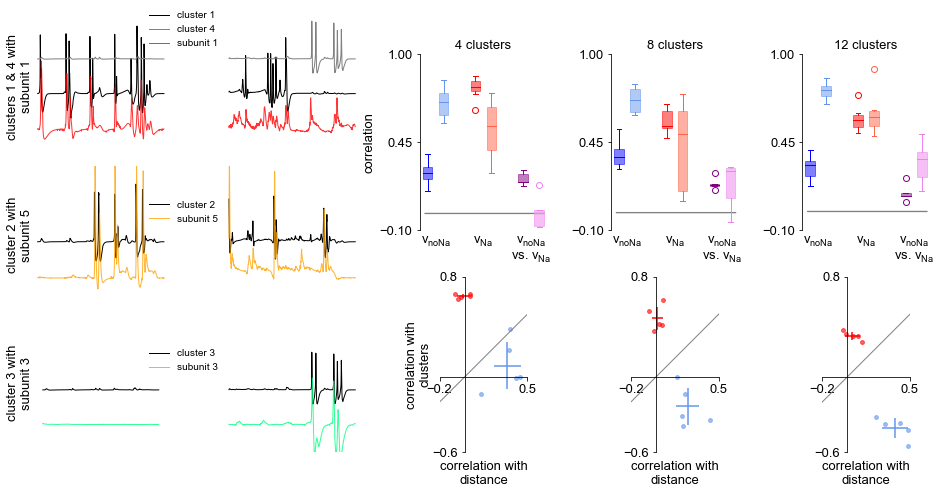

In [19]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (16,8))
gs = fig.add_gridspec(12,5, wspace=0.5, hspace=0.35)
ax11 = fig.add_subplot(gs[1:6,2])
ax12 = fig.add_subplot(gs[1:6,3])
ax13 = fig.add_subplot(gs[1:6,4])
ax21 = fig.add_subplot(gs[7:,2])
ax22 = fig.add_subplot(gs[7:,3])
ax23 = fig.add_subplot(gs[7:,4])
#ax4 = fig.add_subplot(gs[7:,3])
ax5 = fig.add_subplot(gs[:4,0])
ax6 = fig.add_subplot(gs[:4,1])
ax7 = fig.add_subplot(gs[4:8,0])
ax8 = fig.add_subplot(gs[4:8,1])
ax9 = fig.add_subplot(gs[8:,0])
ax10 = fig.add_subplot(gs[8:,1])


colors=["blue", "cornflowerblue", "red", "tomato"]
cap_colors=["blue", "blue", "cornflowerblue", "cornflowerblue", "red", "red", "tomato", "tomato"]
bp1 = ax11.boxplot(within_corrs_weighted[:,:4], positions=[1,2,4,5], widths=0.6, patch_artist=True)
bp2 = ax12.boxplot(within_corrs_weighted[:,4:8], positions=[1,2,4,5], widths=0.6, patch_artist=True)
bp3 = ax13.boxplot(within_corrs_weighted[:,8:12], positions=[1,2,4,5], widths=0.6, patch_artist=True)

for bp in [bp1, bp2, bp3]:
    for i in range(4):
        plt.setp(bp['boxes'][i], facecolor=colors[i])
        plt.setp(bp['boxes'][i], alpha=0.5)
        plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
        plt.setp(bp["boxes"][i], color=colors[i])
        plt.setp(bp["medians"][i], color=colors[i])
    for i in range(8):
        plt.setp(bp['whiskers'][i], color=cap_colors[i])
        plt.setp(bp['caps'][i], color=cap_colors[i])

ax11.fill_between(np.arange(0.8,8.3,0.01), np.mean(within_corrs_weighted[:,-3])-np.std(within_corrs_weighted[:,-3]),
                 np.mean(within_corrs_weighted[:,-3])+np.std(within_corrs_weighted[:,-3]), color="gray")
ax12.fill_between(np.arange(0.8,8.3,0.01), np.mean(within_corrs_weighted[:,-2])-np.std(within_corrs_weighted[:,-2]),
                 np.mean(within_corrs_weighted[:,-2])+np.std(within_corrs_weighted[:,-2]), color="gray")
ax13.fill_between(np.arange(0.8,8.3,0.01), np.mean(within_corrs_weighted[:,-1])-np.std(within_corrs_weighted[:,-1]),
                 np.mean(within_corrs_weighted[:,-1])+np.std(within_corrs_weighted[:,-1]), color="gray")

"""
hB = ax12.scatter(0.75,0.75,c='blue', marker="s")
hR = ax12.scatter(0.75,1,c='red', marker="s")
hP = ax12.scatter(0.75,1.25,c='purple', marker="s")
hC = ax12.scatter(1.25,0.75,c='cyan', marker="s")
hO = ax12.scatter(1.25,1,c='orange', marker="s")
hK = ax12.scatter(1.25,1.25,c='pink', marker="s")
ax12.legend((hB, hR, hP, hC, hO, hK),
            ("", "", "synaptic assignments",
             "", "", "synaptic weights"),
           frameon=False, fontsize=10,
          loc=(0.525, 1.1))
hB.set_visible(False)
hR.set_visible(False)
hP.set_visible(False)
hC.set_visible(False)
hO.set_visible(False)
hK.set_visible(False)
"""

##################################

bp1 = ax11.boxplot(across_corrs_weighted[:,:2], positions=[7,8], widths=0.6, patch_artist=True)
bp2 = ax12.boxplot(across_corrs_weighted[:,2:4], positions=[7,8], widths=0.6, patch_artist=True)
bp3 = ax13.boxplot(across_corrs_weighted[:,4:6], positions=[7,8], widths=0.6, patch_artist=True)

colors = ["purple", "violet"]
cap_colors = ["purple", "purple", "violet", "violet"]
for bp in [bp1, bp2, bp3]:
    for i in range(2):
        plt.setp(bp['boxes'][i], facecolor=colors[i])
        plt.setp(bp['boxes'][i], alpha=0.5)
        plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
        plt.setp(bp["boxes"][i], color=colors[i])
        plt.setp(bp["medians"][i], color=colors[i])
    for i in range(4):
        plt.setp(bp['whiskers'][i], color=cap_colors[i])
        plt.setp(bp['caps'][i], color=cap_colors[i])

for ax in [ax11, ax12, ax13]:
    ax.set_ylim(-0.1,1)
    ax.set_yticks([-0.1,0.45 ,1.0])
    ax.set_xticks([1.5, 4.5, 7.5])
    ax.set_xticklabels(["$\mathregular{v_{noNa}}$", "$\mathregular{v_{Na}}$",
                        "$\mathregular{v_{noNa}}$\nvs. $\mathregular{v_{Na}}$"], rotation=0)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.tick_params(axis="x", length=0)

ax11.set_ylabel("correlation")
ax11.set_title("4 clusters", fontsize=13)
ax12.set_title("8 clusters", fontsize=13)
ax13.set_title("12 clusters", fontsize=13)

################################

#ax21.scatter(dist_corrs_weighted[:,0], clust_corrs_weighted[:,0], s=15, color="blue", alpha=0.6)
ax21.scatter(dist_corrs_weighted[:,1], clust_corrs_weighted[:,1], s=15, color="cornflowerblue", alpha=0.6)
ax21.scatter(dist_corrs_weighted[:,2], clust_corrs_weighted[:,2], s=15, color="red", alpha=0.6)
#ax21.scatter(dist_corrs_weighted[:,3], clust_corrs_weighted[:,3], s=15, color="orange", alpha=0.6)
ax21.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), color="gray", linewidth=1)

#ax22.scatter(dist_corrs_weighted[:,4], clust_corrs_weighted[:,4], s=15, color="blue", alpha=0.6)
ax22.scatter(dist_corrs_weighted[:,5], clust_corrs_weighted[:,5], s=15, color="cornflowerblue", alpha=0.6)
ax22.scatter(dist_corrs_weighted[:,6], clust_corrs_weighted[:,6], s=15, color="red", alpha=0.6)
#ax22.scatter(dist_corrs_weighted[:,7], clust_corrs_weighted[:,7], s=15, color="orange", alpha=0.6)
ax22.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), color="gray", linewidth=1)

#ax23.scatter(dist_corrs_weighted[:,8], clust_corrs_weighted[:,8], s=15, color="blue", alpha=0.6)
ax23.scatter(dist_corrs_weighted[:,9], clust_corrs_weighted[:,9], s=15, color="cornflowerblue", alpha=0.6)
ax23.scatter(dist_corrs_weighted[:,10], clust_corrs_weighted[:,10], s=15, color="red", alpha=0.6)
#ax23.scatter(dist_corrs_weighted[:,11], clust_corrs_weighted[:,11], s=15, color="orange", alpha=0.6)
ax23.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), color="gray", linewidth=1)

ax21.set_xlim(-0.1,0.5)
ax21.set_ylim(-0.5,0.8)
ax22.set_xlim(-0.1,0.5)
ax22.set_ylim(-0.5,0.8)
ax23.set_xlim(-0.1,0.5)
ax23.set_ylim(-0.5,0.8)

ax21.set_ylabel("correlation with\nclusters", labelpad=0)

ax_list = [ax21, ax22, ax23]
for ax in ax_list:
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_yticks([-0.6, 0.8])
    ax.set_xticks([-0.2, 0.5])
    ax.set_aspect(1)
    ax.set_xlabel("correlation with\ndistance", labelpad=65)

ax_error_list = [ax21, ax21,
                 ax22, ax22, 
                 ax23, ax23, ]
error_color_list = ["cornflowerblue", "red", 
                   "cornflowerblue", "red", 
                   "cornflowerblue", "red"]
idx_list = [1,2, 5,6, 9,10]
for i in range(len(ax_error_list)):
    idx = idx_list[i]
    ax_error_list[i].errorbar(np.mean(dist_corrs_weighted[:,idx]), np.mean(clust_corrs_weighted[:,idx]),
               xerr=np.std(dist_corrs_weighted[:,idx]), yerr=np.std(clust_corrs_weighted[:,idx]),
                             color=error_color_list[i])

################################
ax5.plot(true4_dend[0][17000:20000]+25, linewidth=1, color="black", label="cluster 1")
ax5.plot(true4_dend[3][17000:20000]+50, linewidth=1, color="gray", label="cluster 4")
ax5.plot(gru4_diff_subout[0][17000:20000]*50, linewidth=1, color="#ff0000", alpha=0.8, label="subunit 1")
ax5.set_ylabel("clusters 1 & 4 with\nsubunit 1")
ax5.margins(x=0.005, y=0.005)
ax5.legend(loc=(0.85,0.75), frameon=False, fontsize=10)

ax6.plot(true4_dend[0][22500:25500]+25, linewidth=1, color="black")
ax6.plot(true4_dend[2][22500:25500]+50, linewidth=1, color="gray")
ax6.plot(gru4_diff_subout[0][22500:25500]*50, linewidth=1, color="#ff0000", alpha=0.8)
ax6.margins(x=0.005, y=0.005)

ax7.plot(true4_dend[1][17000:20000]+25, linewidth=1, color="black", label="cluster 2")
ax7.plot(gru4_diff_subout[4][17000:20000]*50, linewidth=1, color="#ffa200", alpha=0.8, label="subunit 5")
ax7.set_ylabel("cluster 2 with\nsubunit 5")
#ax7.set_title("timepoint 1", fontsize=13)
ax7.margins(x=0.005, y=0.005)
ax7.legend(loc=(0.85,0.55), frameon=False, fontsize=10)

ax8.plot(true4_dend[1][22500:25500]+25, linewidth=1, color="black")
ax8.plot(gru4_diff_subout[4][22500:25500]*50, linewidth=1, color="#ffa200", alpha=0.8)
#ax8.set_title("timepoint 2", fontsize=13)
ax8.margins(x=0.005, y=0.005)

ax9.plot(true4_dend[2][17000:20000]+25, linewidth=1, color="black", label="cluster 3")
ax9.plot(gru4_diff_subout[2][17000:20000]*50, linewidth=1, color="#00ff80", alpha=0.8, label="subunit 3")
ax9.legend(loc=(0.85,0.55), frameon=False, fontsize=10)
ax9.set_ylabel("cluster 3 with\nsubunit 3")
#ax9.set_title("timepoint 1", fontsize=13)
#ax9.margins(x=0.005, y=0.005)

ax10.plot(true4_dend[2][22500:25500]+25, linewidth=1, color="black")
ax10.plot(gru4_diff_subout[2][22500:25500]*50, linewidth=1, color="#00ff80", alpha=0.8)
ax10.margins(x=0.005, y=0.005)
#ax10.set_title("timepoint 2", fontsize=13)

ax_list = [ax5, ax6, ax7, ax8, ax9, ax10]

for ax in ax_list:
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.set_xticks([])
    ax.set_ylim(-20,80)
    ax.set_yticks([])

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig9/fig9_raw.pdf", bbox_inches="tight", transparent=True)

# old boxplots

In [ ]:
####################################
bp = ax3.boxplot(dist_corrs_weighted[:,:-3], positions=[1,2,4,5,7,8], widths=0.6, patch_artist=True)
colors=["blue", "red", "blue", "red", "blue", "red"]
cap_colors=["blue", "blue", "red", "red",
           "blue", "blue", "red", "red",
           "blue", "blue", "red", "red"]
for i in range(dist_corrs_weighted[:,:-3].shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(dist_corrs_weighted[:,:-3].shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
ax3.fill_between(np.arange(0.8,2.3,0.01), np.mean(dist_corrs_weighted[:,-3])-np.std(dist_corrs_weighted[:,-3]),
                 np.mean(dist_corrs_weighted[:,-3])+np.std(dist_corrs_weighted[:,-3]), color="gray")
ax3.fill_between(np.arange(3.8,5.3,0.01), np.mean(dist_corrs_weighted[:,-2])-np.std(dist_corrs_weighted[:,-2]),
                 np.mean(dist_corrs_weighted[:,-2])+np.std(dist_corrs_weighted[:,-2]), color="gray")
ax3.fill_between(np.arange(6.8,8.3,0.01), np.mean(dist_corrs_weighted[:,-1])-np.std(dist_corrs_weighted[:,-1]),
                 np.mean(dist_corrs_weighted[:,-1])+np.std(dist_corrs_weighted[:,-1]), color="gray")

ax3.set_ylim(-0.2,1)
ax3.set_yticks([-0.2,0.2,0.6,1.0])
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.set_xticks([1.5, 4.5, 7.5])
ax3.set_xticklabels(["4", "8", "12"])
ax3.tick_params(axis="x", length=0)
ax3.set_xlabel("no. of clusters")
ax3.set_ylabel("correlation")
ax3.set_title("correlation between architecture\nand somatic distance",
             fontsize=13)

####################################
bp = ax4.boxplot(clust_corrs_weighted[:,:-3], positions=[1,2,4,5,7,8], widths=0.6, patch_artist=True)
colors=["blue", "red", "blue", "red", "blue", "red"]
cap_colors=["blue", "blue", "red", "red",
           "blue", "blue", "red", "red",
           "blue", "blue", "red", "red"]
for i in range(clust_corrs_weighted[:,:-3].shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(clust_corrs_weighted[:,:-3].shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
ax4.fill_between(np.arange(0.8,2.3,0.01), np.mean(clust_corrs_weighted[:,-3])-np.std(clust_corrs_weighted[:,-3]),
                 np.mean(clust_corrs_weighted[:,-3])+np.std(clust_corrs_weighted[:,-3]), color="gray")
ax4.fill_between(np.arange(3.8,5.3,0.01), np.mean(clust_corrs_weighted[:,-2])-np.std(clust_corrs_weighted[:,-2]),
                 np.mean(clust_corrs_weighted[:,-2])+np.std(clust_corrs_weighted[:,-2]), color="gray")
ax4.fill_between(np.arange(6.8,8.3,0.01), np.mean(clust_corrs_weighted[:,-1])-np.std(clust_corrs_weighted[:,-1]),
                 np.mean(clust_corrs_weighted[:,-1])+np.std(clust_corrs_weighted[:,-1]), color="gray")

ax4.set_ylim(-0.2,1)
ax4.set_yticks([-0.2,0.2,0.6,1.0])
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.set_xticks([1.5, 4.5, 7.5])
ax4.set_xticklabels(["4", "8", "12"])
ax4.tick_params(axis="x", length=0)
ax4.set_xlabel("no. of clusters")
ax4.set_title("correlation between\narchitecture and clusters",
             fontsize=13)

# thresh find

In [ ]:
gap_no = 50
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
corr_vals = np.zeros((rep_no, gap_no, 3))
distance_matrix = C12_dist
unique_dist = np.unique(distance_matrix)

for n in range(rep_no):
    weight_matrix = C12_nona_scale_mat_all[n][x,y]
    subunit_matrix = C12_nona_all[n][x,y]

    for i in tnrange(gap_no):
        dist_bin = np.zeros((2000*2000))
        thresh_gap = unique_dist.shape[0] // gap_no
        thresh_gap = 20000 // gap_no
        #thresh_gap = 1
        idx = np.where(distance_matrix.flatten() >= unique_dist[i*thresh_gap+220000])[0]
        dist_bin[idx] = 1
        dist_bin = dist_bin.reshape((2000,2000))

        dist_corr_val = WeightedCorr(x=pd.Series(dist_bin[x,y]),
                       y=pd.Series(subunit_matrix),
                       w=pd.Series(weight_matrix))(method='spearman')
        corr_vals[n,i,0] = i*thresh_gap+220000
        corr_vals[n,i,1] = unique_dist[i*thresh_gap+220000]
        corr_vals[n,i,2] = dist_corr_val

# heatmap

In [ ]:
C4_diff_rep_corr_weighted = np.zeros((rep_no, rep_no))
C4_nona_rep_corr_weighted = np.zeros((rep_no, rep_no))
C8_diff_rep_corr_weighted = np.zeros((rep_no, rep_no))
C8_nona_rep_corr_weighted = np.zeros((rep_no, rep_no))
C12_diff_rep_corr_weighted = np.zeros((rep_no, rep_no))
C12_nona_rep_corr_weighted = np.zeros((rep_no, rep_no))

within_count = 0
for i in range(rep_no):
    for j in range(i+1,rep_no,1):
        C4_nona_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 0]
        C4_nona_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 0]
        C4_diff_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 1]
        C4_diff_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 1]
        C8_nona_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 2]
        C8_nona_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 2]
        C8_diff_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 3]
        C8_diff_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 3]
        C12_nona_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 4]
        C12_nona_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 4]
        C12_diff_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 5]
        C12_diff_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 5]
        
        within_count += 1

C4_diff_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C4_nona_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C8_diff_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C8_nona_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C12_diff_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C12_nona_heatmap_weighted = np.zeros((rep_no+3, rep_no))

C4_nona_heatmap_weighted[:rep_no,:] = C4_nona_rep_corr_weighted
C4_nona_heatmap_weighted[-3,:] = dist_corrs_weighted[:,0]
C4_diff_heatmap_weighted[:rep_no,:] = C4_diff_rep_corr_weighted
C4_diff_heatmap_weighted[-3,:] = dist_corrs_weighted[:,1]
C8_nona_heatmap_weighted[:rep_no,:] = C8_nona_rep_corr_weighted
C8_nona_heatmap_weighted[-3,:] = dist_corrs_weighted[:,2]
C8_diff_heatmap_weighted[:rep_no,:] = C8_diff_rep_corr_weighted
C8_diff_heatmap_weighted[-3,:] = dist_corrs_weighted[:,3]
C12_nona_heatmap_weighted[:rep_no,:] = C12_nona_rep_corr_weighted
C12_nona_heatmap_weighted[-3,:] = dist_corrs_weighted[:,4]
C12_diff_heatmap_weighted[:rep_no,:] = C12_diff_rep_corr_weighted
C12_diff_heatmap_weighted[-3,:] = dist_corrs_weighted[:,5]

for i in tnrange(rep_no):
    C4_nona_rand = WeightedCorr(x=pd.Series(C4_rand_all[i][x,y]),
                   y=pd.Series(C4_nona_all[i][x,y]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x,y]))(method=corr_type)
    C4_diff_rand = WeightedCorr(x=pd.Series(C4_rand_all[i][x,y]),
                   y=pd.Series(C4_diff_all[i][x,y]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x,y]))(method=corr_type)
    C8_nona_rand = WeightedCorr(x=pd.Series(C8_rand_all[i][x,y]),
                   y=pd.Series(C4_nona_all[i][x,y]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x,y]))(method=corr_type)
    C8_diff_rand = WeightedCorr(x=pd.Series(C8_rand_all[i][x,y]),
                   y=pd.Series(C4_diff_all[i][x,y]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x,y]))(method=corr_type)
    C12_nona_rand = WeightedCorr(x=pd.Series(C12_rand_all[i][x,y]),
                   y=pd.Series(C12_nona_all[i][x,y]),
                   w=pd.Series(C12_nona_scale_mat_all[i][x,y]))(method=corr_type)
    C12_diff_rand = WeightedCorr(x=pd.Series(C12_rand_all[i][x,y]),
                   y=pd.Series(C12_diff_all[i][x,y]),
                   w=pd.Series(C12_diff_scale_mat_all[i][x,y]))(method=corr_type)
    
    C4_nona_clust = WeightedCorr(x=pd.Series(C4_clust[x_part,y_part]),
                   y=pd.Series(C4_nona_all[i][x_part,y_part]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C4_diff_clust = WeightedCorr(x=pd.Series(C4_clust[x_part,y_part]),
                   y=pd.Series(C4_diff_all[i][x_part,y_part]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C8_nona_clust = WeightedCorr(x=pd.Series(C8_clust[x_part,y_part]),
                   y=pd.Series(C4_nona_all[i][x_part,y_part]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C8_diff_clust = WeightedCorr(x=pd.Series(C8_clust[x_part,y_part]),
                   y=pd.Series(C4_diff_all[i][x_part,y_part]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C12_nona_clust = WeightedCorr(x=pd.Series(C12_clust[x_part,y_part]),
                   y=pd.Series(C12_nona_all[i][x_part,y_part]),
                   w=pd.Series(C12_nona_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C12_diff_clust = WeightedCorr(x=pd.Series(C12_clust[x_part,y_part]),
                   y=pd.Series(C12_diff_all[i][x_part,y_part]),
                   w=pd.Series(C12_diff_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    
    C4_nona_heatmap_weighted[-1,i] = C4_nona_rand
    C4_diff_heatmap_weighted[-1,i] = C4_diff_rand
    C8_nona_heatmap_weighted[-1,i] = C8_nona_rand
    C8_diff_heatmap_weighted[-1,i] = C8_diff_rand
    C12_nona_heatmap_weighted[-1,i] = C12_nona_rand
    C12_diff_heatmap_weighted[-1,i] = C12_diff_rand
    C4_nona_heatmap_weighted[-2,i] = C4_nona_clust
    C4_diff_heatmap_weighted[-2,i] = C4_diff_clust
    C8_nona_heatmap_weighted[-2,i] = C8_nona_clust
    C8_diff_heatmap_weighted[-2,i] = C8_diff_clust
    C12_nona_heatmap_weighted[-2,i] = C12_nona_clust
    C12_diff_heatmap_weighted[-2,i] = C12_diff_clust